In [1]:
# http://localhost:8888/?token=7d7b0a0f980f752a196433d3735be87cbb86eb7584d7119b
# https://towardsdatascience.com/how-to-create-maps-in-plotly-with-non-us-locations-ca974c3bc997

In [2]:
# conda install geopandas

In [3]:
# pip install descartes

In [4]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import plotly.graph_objects as go

In [5]:
lga_gdf = gpd.read_file('VICShapefile/VIC_LGA_POLYGON_SHP_GDA2020.shp') #load the data using Geopandas
# lga_gdf = lga_gdf[lga_gdf['STE_NAME16']=='Victoria'] #Select the data for the state of Victoria
# lga_gdf['LGA_CODE20'] = lga_gdf['LGA_CODE20'].astype('str') # we will join on this axis, so both dataframes need this to be the same type
lga_gdf.head()

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,LGA_NAME,ABB_NAME,DT_GAZETD,STATE_PID,geometry
0,465,2017-09-08,None,VIC246,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12998, 146.46062 -37.1..."
1,484,2017-09-08,None,VIC230,GOLDEN PLAINS SHIRE,GOLDEN PLAINS,None,2,"POLYGON ((144.08424 -38.11004, 144.08379 -38.1..."
2,491,2017-09-08,None,VIC190,MOIRA SHIRE,MOIRA,None,2,"POLYGON ((146.21054 -36.11528, 146.21009 -36.1..."
3,502,2017-09-08,None,VIC205,DAREBIN CITY,DAREBIN,None,2,"POLYGON ((144.98381 -37.76402, 144.98367 -37.7..."
4,504,2017-09-08,None,VIC207,MAROONDAH CITY,MAROONDAH,None,2,"POLYGON ((145.28728 -37.83331, 145.28727 -37.8..."


In [69]:

lga_gdf.to_csv('Resources/lga.csv',encoding='utf-8',index=False,header=True)

In [6]:

lga_gdf['LGA_PID'] = lga_gdf['LGA_PID'].str.extract(r'(\d+)', expand=False)
lga_gdf['LGA_PID']=lga_gdf[["LGA_PID","LGA_NAME","geometry"]]
# lga_gdf['LGA_PID'] = lga_gdf['LGA_PID'].astype('str')
lga_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   LG_PLY_PID  92 non-null     object  
 1   DT_CREATE   92 non-null     object  
 2   DT_RETIRE   0 non-null      object  
 3   LGA_PID     92 non-null     object  
 4   LGA_NAME    92 non-null     object  
 5   ABB_NAME    92 non-null     object  
 6   DT_GAZETD   0 non-null      object  
 7   STATE_PID   92 non-null     object  
 8   geometry    92 non-null     geometry
dtypes: geometry(1), object(8)
memory usage: 6.6+ KB


In [7]:
school_data = pd.read_csv('Resources/school list 2021.csv',encoding='cp1252')
school_data.head()

,Education_Sector,Entity_Type,SCHOOL_NO,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [8]:
#Call 2021 Property sales stats
Stat_21 = pd.read_csv('Resources/yearly_data_clean_2021.csv',encoding='cp1252')
Stat_21.head()

,Postcode,Suburb,ID_Domain,medianSoldPrice,numberSold,highestSoldPrice,lowestSoldPrice,5thPercentileSoldPrice,25thPercentileSoldPrice,75thPercentileSoldPrice,...,medianSaleListingPrice,numberSaleListing,highestSaleListingPrice,lowestSaleListingPrice,auctionNumberAuctioned,auctionNumberSold,medianRentListingPrice,numberRentListing,highestRentListingPrice,lowestRentListingPrice
0,3067,Abbotsford,627,1220000.0,75.0,2810000.0,735000.0,863000.0,1025000.0,1445000.0,...,1200000.0,89.0,2625000.0,499000.0,49.0,32.0,610.0,204.0,1300.0,320.0
1,3040,Aberfeldie,647,1360000.0,223.0,4000000.0,283000.0,545000.0,1000000.0,1811000.0,...,1250000.0,295.0,7000000.0,280000.0,147.0,92.0,495.0,419.0,1250.0,230.0
2,3042,Airport West,757,1050000.0,99.0,2870000.0,600000.0,710000.0,849000.0,1265000.0,...,965000.0,115.0,2900000.0,590000.0,65.0,40.0,500.0,135.0,1100.0,280.0
3,3021,Albanvale,787,613000.0,336.0,1550000.0,330000.0,450000.0,555000.0,685000.0,...,599000.0,506.0,1460000.0,55000.0,91.0,43.0,350.0,655.0,1593.0,170.0
4,3206,Albert Park,797,2680000.0,49.0,8600000.0,1235000.0,1525000.0,2250000.0,3575000.0,...,2600000.0,65.0,9750000.0,1300000.0,35.0,19.0,800.0,99.0,1900.0,330.0


In [9]:

school_reduced=school_data[["Education_Sector","SCHOOL_NO","School_Name","School_Type","Address_Line_1","Address_Town","Address_Postcode","LGA_ID","LGA_Name","X","Y"]]
school_reduced.head()


,Education_Sector,SCHOOL_NO,School_Name,School_Type,Address_Line_1,Address_Town,Address_Postcode,LGA_ID,LGA_Name,X,Y
0,Government,1,Alberton Primary School,Primary,21 Thomson Street,Alberton,3971,681,Wellington (S),146.666601,-38.617713
1,Government,3,Allansford and District Primary School,Primary,Frank Street,Allansford,3277,673,Warrnambool (C),142.590393,-38.386281
2,Government,4,Avoca Primary School,Primary,118 Barnett Street,Avoca,3467,599,Pyrenees (S),143.475649,-37.084502
3,Government,8,Avenel Primary School,Primary,40 Anderson Street,Avenel,3664,643,Strathbogie (S),145.234722,-36.901368
4,Government,12,Warrandyte Primary School,Primary,5-11 Forbes Street,Warrandyte,3113,421,Manningham (C),145.213980,-37.742675


In [10]:
rename_school=school_reduced.rename(columns={"Education_Sector":"Education sector",
                                     "SCHOOL_NO":"School number",
                                     "School_Name":"Name",
                                     "School_Type":"Type",
                                     "Address_Line_1":"Address",
                                     "Address_Town":"Town/city",
                                     "Address_Postcode":"Postcode",
                                     "LGA_ID":"LGA_PID",
                                     "X":"Longitude",
                                     "Y":"Latitude",})
rename_school.head()



,Education sector,School number,Name,Type,Address,Town/city,Postcode,LGA_PID,LGA_Name,Longitude,Latitude
0,Government,1,Alberton Primary School,Primary,21 Thomson Street,Alberton,3971,681,Wellington (S),146.666601,-38.617713
1,Government,3,Allansford and District Primary School,Primary,Frank Street,Allansford,3277,673,Warrnambool (C),142.590393,-38.386281
2,Government,4,Avoca Primary School,Primary,118 Barnett Street,Avoca,3467,599,Pyrenees (S),143.475649,-37.084502
3,Government,8,Avenel Primary School,Primary,40 Anderson Street,Avenel,3664,643,Strathbogie (S),145.234722,-36.901368
4,Government,12,Warrandyte Primary School,Primary,5-11 Forbes Street,Warrandyte,3113,421,Manningham (C),145.213980,-37.742675


In [11]:
rename_school.to_csv('Resources/school list clean.csv',encoding='utf-8',index=False,header=True)


In [12]:
#merge data
combined_df=pd.merge(rename_school,Stat_21,how="inner",on="Postcode")
combined_df['LGA_PID'] = combined_df['LGA_PID'].astype('str')
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2307
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Education sector         2308 non-null   object 
 1   School number            2308 non-null   int64  
 2   Name                     2308 non-null   object 
 3   Type                     2308 non-null   object 
 4   Address                  2308 non-null   object 
 5   Town/city                2308 non-null   object 
 6   Postcode                 2308 non-null   int64  
 7   LGA_PID                  2308 non-null   object 
 8   LGA_Name                 2308 non-null   object 
 9   Longitude                2308 non-null   float64
 10  Latitude                 2308 non-null   float64
 11  Suburb                   2308 non-null   object 
 12  ID_Domain                2308 non-null   int64  
 13  medianSoldPrice          2308 non-null   float64
 14  numberSold              

In [13]:
combined_df=combined_df[["Education sector","School number","Name","Postcode","LGA_PID","LGA_Name","Longitude","Latitude","medianSoldPrice","numberSold"]]



In [14]:
combined_df["LGA_PID"].unique()


array(['421', '91', '343', '311', '534', '571', '66', '506', '460', '433',
       '111', '465', '735', '698', '525', '707', '635', '726', '497',
       '189', '745', '327', '367', '590', '217', '161', '441', '231',
       '118', '267', '145'], dtype=object)

In [15]:
grouped_combined_df=combined_df.groupby(['Postcode'])
print(grouped_combined_df)
grouped_combined_df.count().head(10)

,Education sector,School number,Name,LGA_PID,LGA_Name,Longitude,Latitude,medianSoldPrice,numberSold
Postcode,,,,,,,,,
3003,1,1,1,1,1,1,1,1,1
3008,1,1,1,1,1,1,1,1,1
3011,12,12,12,12,12,12,12,12,12
3012,15,15,15,15,15,15,15,15,15
3013,5,5,5,5,5,5,5,5,5
3015,18,18,18,18,18,18,18,18,18
3016,12,12,12,12,12,12,12,12,12
3018,10,10,10,10,10,10,10,10,10
3019,6,6,6,6,6,6,6,6,6


In [16]:
#Count shool number under all postcodes
school_count=grouped_combined_df["Postcode"].count()


Postcode
3003      1
3008      1
3011     12
3012     15
3013      5
       ... 
3939      5
3941      4
3943      2
3976      6
3977    208
Name: Postcode, Length: 170, dtype: int64

In [17]:
school_count_df=pd.DataFrame(school_count)
school_count_df=school_count_df.rename(columns={"Postcode":"School count"})
school_count_df.reset_index()

,Postcode,School count
0,3003,1
1,3008,1
2,3011,12
3,3012,15
4,3013,5
...,...,...
165,3939,5
166,3941,4
167,3943,2
168,3976,6


In [18]:
combined_shool_count=pd.merge(school_count_df,combined_df,how="outer",on="Postcode")
combined_shool_count['medianSoldPrice'] = combined_shool_count['medianSoldPrice'].fillna(0)
combined_shool_count.head(10)

,Postcode,School count,Education sector,School number,Name,LGA_PID,LGA_Name,Longitude,Latitude,medianSoldPrice,numberSold
0,3003,1,Catholic,25,Simonds Catholic College,460,Melbourne (C),144.952883,-37.805971,1110000.0,43.0
1,3008,1,Government,5573,Docklands Primary School,460,Melbourne (C),144.940553,-37.812714,1278000.0,12.0
2,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
3,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
4,3011,12,Government,1912,Footscray City Primary School,433,Maribyrnong (C),144.900253,-37.806400,1061000.0,96.0
5,3011,12,Government,1912,Footscray City Primary School,433,Maribyrnong (C),144.900253,-37.806400,1061000.0,96.0
6,3011,12,Government,4160,Footscray North Primary School,433,Maribyrnong (C),144.883372,-37.787746,1061000.0,96.0
7,3011,12,Government,4160,Footscray North Primary School,433,Maribyrnong (C),144.883372,-37.787746,1061000.0,96.0
8,3011,12,Government,7842,Footscray High School,433,Maribyrnong (C),144.893763,-37.791043,1061000.0,96.0
9,3011,12,Government,7842,Footscray High School,433,Maribyrnong (C),144.893763,-37.791043,1061000.0,96.0


In [19]:
combined_shool_count_clean=combined_shool_count.dropna(subset=["LGA_PID"],inplace=False)
combined_shool_count_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2308 entries, 0 to 2307
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Postcode          2308 non-null   int64  
 1   School count      2308 non-null   int64  
 2   Education sector  2308 non-null   object 
 3   School number     2308 non-null   int64  
 4   Name              2308 non-null   object 
 5   LGA_PID           2308 non-null   object 
 6   LGA_Name          2308 non-null   object 
 7   Longitude         2308 non-null   float64
 8   Latitude          2308 non-null   float64
 9   medianSoldPrice   2308 non-null   float64
 10  numberSold        2308 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 216.4+ KB


In [20]:
combined_shool_count_clean.head()

,Postcode,School count,Education sector,School number,Name,LGA_PID,LGA_Name,Longitude,Latitude,medianSoldPrice,numberSold
0,3003,1,Catholic,25,Simonds Catholic College,460,Melbourne (C),144.952883,-37.805971,1110000.0,43.0
1,3008,1,Government,5573,Docklands Primary School,460,Melbourne (C),144.940553,-37.812714,1278000.0,12.0
2,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
3,3011,12,Government,253,Footscray Primary School,433,Maribyrnong (C),144.892669,-37.798383,1061000.0,96.0
4,3011,12,Government,1912,Footscray City Primary School,433,Maribyrnong (C),144.900253,-37.806400,1061000.0,96.0


In [74]:
lga_testing=lga_gdf.rename(columns={"LG_PLY_PID":"LGA_PID","LGA_PID":"LGA_PIDReal"})
lga_testing.head()


,LGA_PID,DT_CREATE,DT_RETIRE,LGA_PIDReal,LGA_NAME,ABB_NAME,DT_GAZETD,STATE_PID,geometry
0,465,2017-09-08,None,246,MOUNT BULLER ALPINE RESORT (UNINCORPORATED),MOUNT BULLER ALPINE RESORT (UNINC),None,2,"POLYGON ((146.46042 -37.12998, 146.46062 -37.1..."
1,484,2017-09-08,None,230,GOLDEN PLAINS SHIRE,GOLDEN PLAINS,None,2,"POLYGON ((144.08424 -38.11004, 144.08379 -38.1..."
2,491,2017-09-08,None,190,MOIRA SHIRE,MOIRA,None,2,"POLYGON ((146.21054 -36.11528, 146.21009 -36.1..."
3,502,2017-09-08,None,205,DAREBIN CITY,DAREBIN,None,2,"POLYGON ((144.98381 -37.76402, 144.98367 -37.7..."
4,504,2017-09-08,None,207,MAROONDAH CITY,MAROONDAH,None,2,"POLYGON ((145.28728 -37.83331, 145.28727 -37.8..."


In [75]:
# df_merged = pd.merge(lga_gdf[['LGA_PID', 'geometry', 'LGA_NAME']], combined_shool_count_clean[['LGA_PID', 'School count','Name','LGA_Name','Longitude','Latitude','medianSoldPrice']], left_on='LGA_PID', right_on='LGA_PID', how='left')
df_merged = pd.merge(lga_testing, combined_shool_count_clean, left_on='LGA_PID', right_on='LGA_PID', how='outer')
df_merged['School count'] = df_merged['School count'].fillna(0)
df_merged['medianSoldPrice'] = df_merged['medianSoldPrice'].fillna(0)
df_merged_drop=df_merged.drop_duplicates(subset="School number",keep='first', inplace = False)
# df_merged = df_merged.dropna(subset=['geometry']).set_index('LGA_PID')
df_merged_drop.describe()

,Postcode,School count,School number,Longitude,Latitude,medianSoldPrice,numberSold
count,1051.000000,1052.000000,1051.000000,1051.000000,1051.000000,1.052000e+03,1051.000000
mean,3199.525214,26.790875,3876.478592,145.052395,-37.849572,1.075747e+06,181.670790
std,254.500852,37.075180,2462.491530,0.174448,0.141452,5.279110e+05,149.925391
min,3003.000000,0.000000,5.000000,144.542859,-38.411870,0.000000e+00,10.000000
25%,3060.000000,6.000000,1678.500000,144.938904,-37.908606,7.150000e+05,73.000000
50%,3130.000000,12.000000,4055.000000,145.058751,-37.830151,9.060000e+05,133.000000
75%,3179.000000,33.000000,5259.000000,145.166466,-37.756774,1.265000e+06,254.000000
max,3977.000000,208.000000,8916.000000,145.510840,-37.528608,4.500000e+06,842.000000


In [52]:
df_merged_drop['medianSoldPrice'].unique()

array([      0., 1870000., 1913000., 1653000., 1208000., 1273000.,
       1670000., 1681000., 1647000.,  730000.,  906000.,  490000.,
        590000.,  679000.,  650000., 1490000., 1258000.,  994000.,
        757000., 1373000.,  753000.,  845000., 1110000., 1278000.,
       1030000., 1150000., 1425000., 1326000., 1328000., 1895000.,
       1061000.,  835000., 1050000., 1618000., 1000000., 1165000.,
        993000.,  825000.,  651000.,  613000.,  630000.,  755000.,
        800000.,  586000.,  748000.,  860000.,  863000., 1270000.,
       1360000.,  516000.,  480000.,  648000.,  563000.,  538000.,
        620000.,  580000.,  595000.,  817000.,  821000.,  966000.,
       1176000.,  849000.,  715000., 1650000., 1393000., 1220000.,
        655000.,  707000.,  645000.,  600000., 2000000.,  699000.,
       1018000.,  830000.,  979000.,  930000., 1255000.,  865000.,
       2353000., 1785000., 2310000., 1945000., 2328000., 2050000.,
       2030000., 2828000., 1880000., 2100000., 1250000., 11590

In [24]:
df_merged_drop.head(100)


,geometry,LGA_NAME,School count,Postcode,Name,LGA_Name,Longitude,Latitude,medianSoldPrice
LGA_PID,,,,,,,,,
246,"POLYGON ((146.46042 -37.12998, 146.46062 -37.1...",MOUNT BULLER ALPINE RESORT (UNINCORPORATED),NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,"POLYGON ((144.08424 -38.11004, 144.08379 -38.1...",GOLDEN PLAINS SHIRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,"POLYGON ((146.21054 -36.11528, 146.21009 -36.1...",MOIRA SHIRE,NaN,NaN,NaN,NaN,NaN,NaN,NaN
205,"POLYGON ((144.98381 -37.76402, 144.98367 -37.7...",DAREBIN CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207,"POLYGON ((145.28728 -37.83331, 145.28727 -37.8...",MAROONDAH CITY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
231,"POLYGON ((143.28712 -38.75753, 143.28561 -38.7...",CORANGAMITE SHIRE,33.0,3204.0,St Paul's School,Glen Eira (C),145.041466,-37.922826,1647000.0
231,"POLYGON ((143.28712 -38.75753, 143.28561 -38.7...",CORANGAMITE SHIRE,33.0,3204.0,St Paul's School,Glen Eira (C),145.041466,-37.922826,1647000.0
231,"POLYGON ((143.28712 -38.75753, 143.28561 -38.7...",CORANGAMITE SHIRE,33.0,3204.0,Our Lady of the Sacred Heart College,Glen Eira (C),145.039942,-37.925723,1647000.0


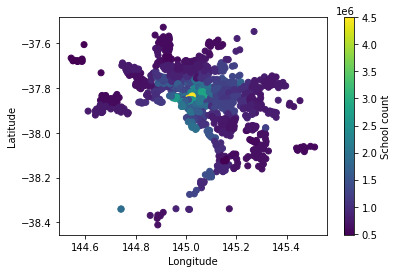

In [49]:
plt.scatter(df_merged_drop['Longitude'], df_merged_drop['Latitude'], c=df_merged_drop['medianSoldPrice'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("School count")

In [70]:
# rename_school
# rename_school['LGA_PID'] = rename_school['LGA_PID'].astype('str')
# # df_merged = pd.merge(lga_gdf[['LGA_PID', 'geometry', 'LGA_NAME']], combined_shool_count_clean[['LGA_PID', 'School count','Name','LGA_Name','Longitude','Latitude','medianSoldPrice']], left_on='LGA_PID', right_on='LGA_PID', how='left')
# df_merged_drop_2 = pd.merge(lga_gdf, rename_school, left_on='LGA_PID', right_on='LGA_PID', how='')
# # df_merged['School count'] = df_merged['School count'].fillna(0)

# # df_merged_drop=df_merged.drop_duplicates(subset="School number",keep='first', inplace = False)
# # df_merged = df_merged.dropna(subset=['geometry']).set_index('LGA_PID')
# df_merged_drop_3 = pd.merge(df_merged_drop_2, Stat_21, left_on='Postcode', right_on='Postcode', how='outer')

# df_merged_drop_3=df_merged_drop_3.dropna(subset=["School number"])
# df_merged_drop_3['medianSoldPrice'] = df_merged_drop_3['medianSoldPrice'].fillna(0)
# df_merged_drop_3.describe()


(140.51119005003702,
 150.42701530246796,
 -39.394332830275474,
 -33.723504498771526)

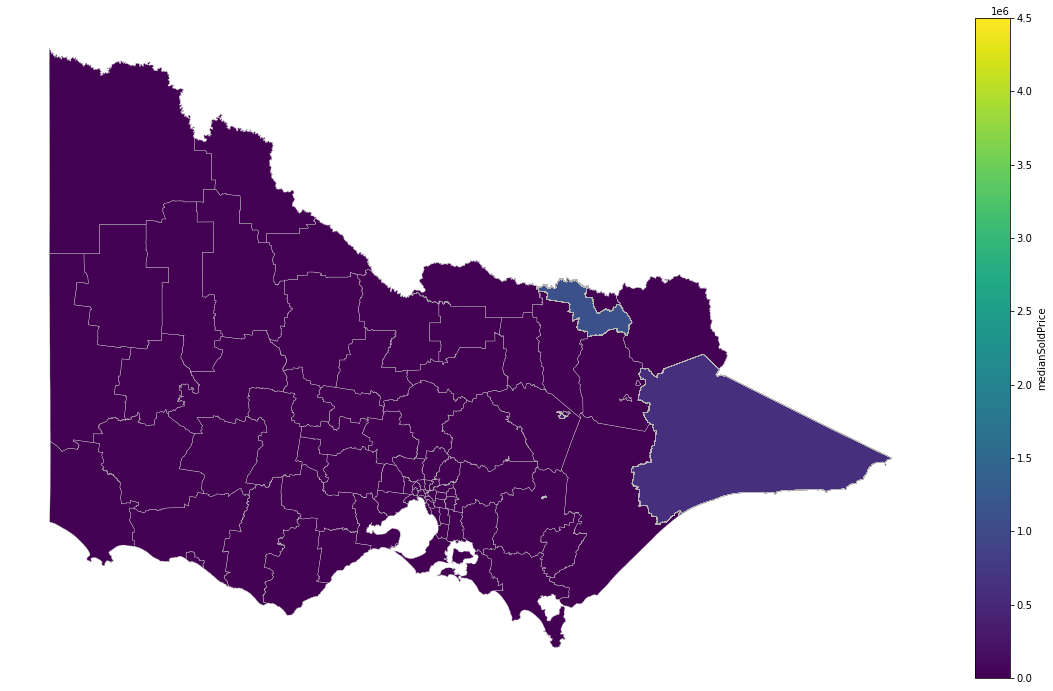

In [76]:
# OPTIONAL: Display using geopandas
fig, ax = plt.subplots(1,1, figsize=(20,20))
divider = make_axes_locatable(ax)
tmp = df_merged.copy()
cax = divider.append_axes("right", size="3%", pad=-1) #resize the colorbar
tmp.plot(column='medianSoldPrice', ax=ax,cax=cax,  legend=True, 
         legend_kwds={'label': "medianSoldPrice"})
tmp.geometry.boundary.plot(color='#BABABA', ax=ax, linewidth=0.3) #Add some borders to the geometries
ax.axis('off')